In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import warnings
warnings.filterwarnings('ignore')

In [12]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

Data normalization 

In [13]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2)

train_size = trainX.shape[0]
train_indices = np.random.choice(train_size, size=int(train_size * 0.2), replace=False)
trainX, trainY = trainX[train_indices], trainY[train_indices]


trainX = (trainX - trainX.min()) / (trainX.max() - trainX.min())
testX = (testX - testX.min()) / (testX.max() - testX.min())
valX = (valX - valX.min()) / (valX.max() - valX.min())

# valY = to_categorical(valY)

print(trainX.shape)

(8000, 32, 32, 3)


Build the MLP

In [14]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='sigmoid', input_shape=(32,32,3)),
    Dense(512, activation='sigmoid'),
    Dense(10, activation='softmax')
])

2023-03-21 20:11:08.189843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(trainX.reshape(-1,32,32,3), trainY, epochs=5, batch_size=32, validation_data=(valX.reshape(-1, 32, 32, 3), valY))

Epoch 1/5
250/250 [==============================] - 8s 27ms/step - loss: 2.0888 - accuracy: 0.2296 - val_loss: 1.9427 - val_accuracy: 0.2832
Epoch 2/5
250/250 [==============================] - 6s 26ms/step - loss: 1.9180 - accuracy: 0.2988 - val_loss: 1.8918 - val_accuracy: 0.3115
Epoch 3/5
250/250 [==============================] - 7s 30ms/step - loss: 1.8424 - accuracy: 0.3200 - val_loss: 1.8169 - val_accuracy: 0.3428
Epoch 4/5
250/250 [==============================] - 7s 27ms/step - loss: 1.8140 - accuracy: 0.3314 - val_loss: 1.8736 - val_accuracy: 0.3310
Epoch 5/5
250/250 [==============================] - 7s 26ms/step - loss: 1.7795 - accuracy: 0.3490 - val_loss: 1.8193 - val_accuracy: 0.3268


313/313 [==============================] - 1s 3ms/step - loss: 1.8211 - accuracy: 0.3335
Training accuracy: 0.3490000069141388
Testing accuracy: 0.3334999978542328


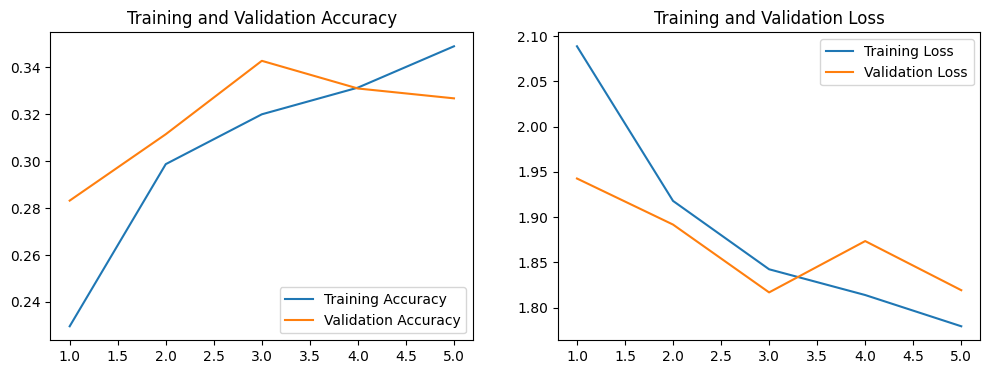

In [16]:
test_loss, test_acc  = model.evaluate(testX.reshape(-1, 32, 32, 3),testY)
print('Training accuracy:', history.history['accuracy'][-1])
print('Testing accuracy:', test_acc)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Step 2 - CNN

In [17]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_2 = model.fit(trainX.reshape(-1,32,32,3), trainY, epochs=5, batch_size=32, validation_data=(valX.reshape(-1, 32, 32, 3), valY))

Epoch 1/5
250/250 [==============================] - 93s 365ms/step - loss: 1.8465 - accuracy: 0.3018 - val_loss: 1.7227 - val_accuracy: 0.3575
Epoch 2/5
250/250 [==============================] - 89s 355ms/step - loss: 1.4204 - accuracy: 0.4831 - val_loss: 1.3893 - val_accuracy: 0.4916
Epoch 3/5
250/250 [==============================] - 87s 350ms/step - loss: 1.1449 - accuracy: 0.5913 - val_loss: 1.3409 - val_accuracy: 0.5205
Epoch 4/5
250/250 [==============================] - 89s 357ms/step - loss: 0.8064 - accuracy: 0.7232 - val_loss: 1.4038 - val_accuracy: 0.5323
Epoch 5/5
250/250 [==============================] - 91s 365ms/step - loss: 0.4240 - accuracy: 0.8683 - val_loss: 1.5628 - val_accuracy: 0.5263


313/313 [==============================] - 8s 26ms/step - loss: 1.5706 - accuracy: 0.5250
Training accuracy: 0.8682500123977661
Testing accuracy: 0.5249999761581421


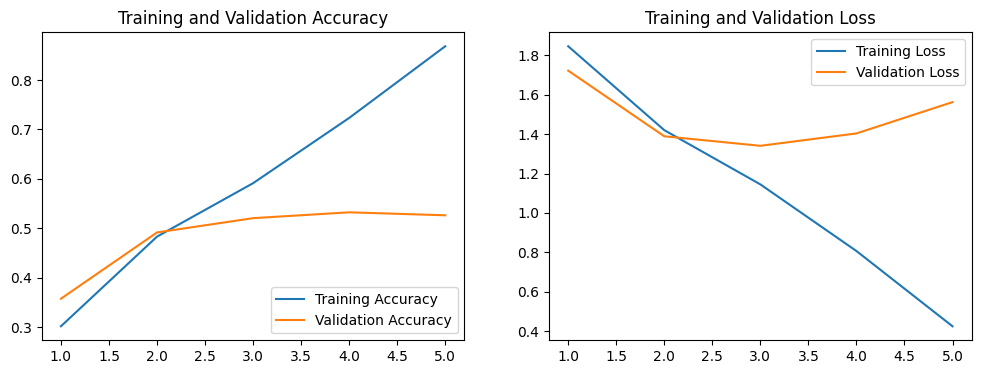

In [18]:
test_loss, test_acc  = model.evaluate(testX.reshape(-1, 32, 32, 3),testY)
print('Training accuracy:', history_2.history['accuracy'][-1])
print('Testing accuracy:', test_acc)

acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Step 3 - CNN

In [19]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dropout(0.2),
    Dense(512, activation='sigmoid'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_3 = model.fit(trainX.reshape(-1,32,32,3), trainY, epochs=5, batch_size=32, validation_data=(valX.reshape(-1, 32, 32, 3), valY))

Epoch 1/5
250/250 [==============================] - 14s 52ms/step - loss: 1.9998 - accuracy: 0.2526 - val_loss: 1.6343 - val_accuracy: 0.3963
Epoch 2/5
250/250 [==============================] - 13s 52ms/step - loss: 1.5889 - accuracy: 0.4096 - val_loss: 1.5118 - val_accuracy: 0.4364
Epoch 3/5
250/250 [==============================] - 13s 53ms/step - loss: 1.4522 - accuracy: 0.4622 - val_loss: 1.4522 - val_accuracy: 0.4608
Epoch 4/5
250/250 [==============================] - 13s 52ms/step - loss: 1.3511 - accuracy: 0.5061 - val_loss: 1.4429 - val_accuracy: 0.4739
Epoch 5/5
250/250 [==============================] - 13s 52ms/step - loss: 1.2403 - accuracy: 0.5506 - val_loss: 1.2810 - val_accuracy: 0.5323


313/313 [==============================] - 3s 9ms/step - loss: 1.2668 - accuracy: 0.5437
Training accuracy: 0.5506250262260437
Testing accuracy: 0.5436999797821045


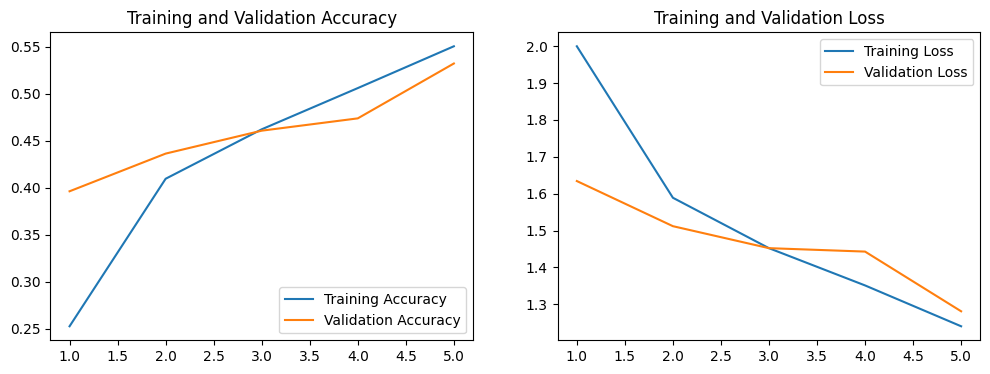

In [20]:
test_loss, test_acc  = model.evaluate(testX.reshape(-1, 32, 32, 3),testY)
print('Training accuracy:', history_3.history['accuracy'][-1])
print('Testing accuracy:', test_acc)

acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()